<a href="https://colab.research.google.com/github/GoutamSachdev/LangGraph/blob/main/Langgraph_Chatbot_With_WIKITOOL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
!pip install langgraph langsmith
!pip install langgraph langsmith langchain langchain_groq langchain_community

In [3]:
!pip install  langchain langchain_groq langchain_community

  Using cached langchain-0.2.15-py3-none-any.whl.metadata (7.1 kB)
  Using cached langchain_groq-0.1.9-py3-none-any.whl.metadata (2.9 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 51.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 86.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.3/106.3 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 4.5 MB/s eta 0:00:00


In [6]:
from google.colab import userdata
groq_ai_api=userdata.get("groqAI")
langsmith=userdata.get("langsmith")

In [7]:
import os
os.environ["LANGCHAIN_API_KEY"]=langsmith
os.environ["LANGCHAIN_TRACING_V2"]="true"
os.environ["LANGCHAIN_PROJECT"]="LiveLanggraph"

In [9]:
from langchain_groq import ChatGroq
chat_groq = ChatGroq(api_key=groq_ai_api,model_name="llama3-8b-8192")

##Start Building Chatbot Using Langgraph

In [22]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph,START,END
from langgraph.graph.message import add_messages

In [23]:
class State(TypedDict):
  # Messages have the type "list". The `add_messages` function
    # in the annotation defines how this state key should be updated
    # (in this case, it appends messages to the list, rather than overwriting them)
  messages:Annotated[list,add_messages]

graph_builder=StateGraph(State)

In [24]:
graph_builder

In [26]:
def chatbot(state:State):
  return {"messages":chat_groq.invoke(state['messages'])}

In [27]:
graph_builder.add_node("chatbot",chatbot)

In [28]:
graph_builder.add_edge(START,"chatbot")
graph_builder.add_edge("chatbot",END)

In [29]:
graph=graph_builder.compile()

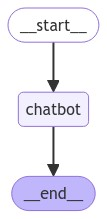

In [30]:
from IPython.display import Image, display
try:
  display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
  pass

In [33]:
while True:
  user_input=input("User: ")
  if user_input.lower() in ["quit","q"]:
    print("Good Bye")
    break
  for event in graph.stream({'messages':("user",user_input)}):
    print(event.values())
    for value in event.values():
      print(value['messages'])

User: good bye
dict_values([{'messages': AIMessage(content='Goodbye! It was nice chatting with you.', response_metadata={'token_usage': {'completion_tokens': 11, 'prompt_tokens': 12, 'total_tokens': 23, 'completion_time': 0.009166667, 'prompt_time': 0.001743164, 'queue_time': 0.118476664, 'total_time': 0.010909831}, 'model_name': 'llama3-8b-8192', 'system_fingerprint': 'fp_af05557ca2', 'finish_reason': 'stop', 'logprobs': None}, id='run-ba5bab13-a14c-4df2-adb6-3d31e0ee3656-0', usage_metadata={'input_tokens': 12, 'output_tokens': 11, 'total_tokens': 23})}])
content='Goodbye! It was nice chatting with you.' response_metadata={'token_usage': {'completion_tokens': 11, 'prompt_tokens': 12, 'total_tokens': 23, 'completion_time': 0.009166667, 'prompt_time': 0.001743164, 'queue_time': 0.118476664, 'total_time': 0.010909831}, 'model_name': 'llama3-8b-8192', 'system_fingerprint': 'fp_af05557ca2', 'finish_reason': 'stop', 'logprobs': None} id='run-ba5bab13-a14c-4df2-adb6-3d31e0ee3656-0' usage_met

In [34]:
!pip install arxiv wikipedia

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 8.1 MB/s eta 0:00:00
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11679 sha256=4807be7556d8bd60096a94a51fbc4dc5156710389760fd98946e925654df42df
  Stored in directory: /root/.cache/pip/wheels/5e/b6/c5/93f3dec388ae76edc830cb42901bb0232504dfc0df02fc50de
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6047 sha256=4807b911e41fe34efe9da63f2d94c179abfa292cd5372c8dc28eaab2b32e8cc1
  Stored in directory: /root/.cache/pip/wheels/f0/69/93/a47e9d621be168e9e33c7ce60524393c0b92ae83cf6c6e89c5
Successfully built wikipedia sgmllib3k


In [36]:
## Working With Tools

from langchain_community.utilities import ArxivAPIWrapper,WikipediaAPIWrapper
from langchain_community.tools import ArxivQueryRun,WikipediaQueryRun

## Arxiv And Wikipedia tools
arxiv_wrapper=ArxivAPIWrapper(top_k_results=1,doc_content_chars_max=300)
arxiv_tool=ArxivQueryRun(api_wrapper=arxiv_wrapper)

api_wrapper=WikipediaAPIWrapper(top_k_results=1,doc_content_chars_max=300)
wiki_tool=WikipediaQueryRun(api_wrapper=api_wrapper)

In [37]:
wiki_tool.invoke("who is ELON MUSK")

'Page: Acquisition of Twitter by Elon Musk\nSummary: Business magnate Elon Musk initiated an acquisition of American social media company Twitter, Inc. on April 14, 2022, and concluded it on October 28, 2022. Musk stated he intended to buy Twitter to build X, an "everything app" he had been developing'

In [38]:
arxiv_tool.invoke("JOB for pakistan")

'Published: 2024-03-09\nTitle: Investigating the Impact of Project Risks on Employee Turnover Intentions in the IT Industry of Pakistan\nAuthors: Ghalib Ahmed Tahir, Murtaza Ashraf\nSummary: Employee turnover remains a pressing issue within high-tech sectors such as\nIT firms and research centers, where '

In [39]:
tools=[wiki_tool]

In [40]:
## Langgraph Application
from langgraph.graph.message import add_messages
class State(TypedDict):
  messages:Annotated[list,add_messages]

In [41]:
from langgraph.graph import StateGraph,START,END

In [42]:
graph_builder= StateGraph(State)

In [43]:
from langchain_groq import ChatGroq

In [44]:
llm_with_tools=chat_groq.bind_tools(tools=tools)

In [45]:
def chatbot(state:State):
  return {"messages":[llm_with_tools.invoke(state["messages"])]}

In [46]:
from langgraph.prebuilt import ToolNode,tools_condition

In [47]:
graph_builder.add_node("chatbot",chatbot)
tool_node = ToolNode(tools=tools)
graph_builder.add_node("tools", tool_node)

graph_builder.add_conditional_edges(
    "chatbot",
    tools_condition,
)
graph_builder.add_edge("tools", "chatbot")
graph_builder.add_edge(START,"chatbot")

In [48]:
graph=graph_builder.compile()

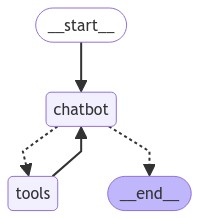

In [49]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [51]:
user_input="Hi there!, My name is Goutam"

events=graph.stream(
     {"messages": [("user", user_input)]},stream_mode="values"
)

for event in events:
  event["messages"][-1].pretty_print()

================================ Human Message =================================

Hi there!, My name is Goutam
================================== Ai Message ==================================

Nice to meet you, Goutam!


In [53]:
user_input = "what is AI AIGent."

# The config is the **second positional argument** to stream() or invoke()!
events = graph.stream(
    {"messages": [("user", user_input)]},stream_mode="values"
)
for event in events:
    event["messages"][-1].pretty_print()

================================ Human Message =================================

what is AI AIGent.
================================== Ai Message ==================================
Tool Calls:
  wikipedia (call_rn1d)
 Call ID: call_rn1d
  Args:
    query: What is AI Agent?
================================= Tool Message =================================
Name: wikipedia

Page: Intelligent agent
Summary: In intelligence and artificial intelligence, an intelligent agent (IA) is an agent that perceives its environment, takes actions autonomously in order to achieve goals, and may improve its performance with learning or acquiring knowledge. An intelligent agent may be 
================================== Ai Message ==================================

Based on the output from the tool call, I can continue the conversation.

An intelligent agent (IA) is an agent that perceives its environment, takes actions autonomously in order to achieve goals, and may improve its performance with learning 

##